In [1]:
!git clone https://github.com/Z-Unlocked/Unlocked_Challenge_4.git

Cloning into 'Unlocked_Challenge_4'...
remote: Enumerating objects: 660, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 660 (delta 5), reused 12 (delta 4), pack-reused 645
Receiving objects: 100% (660/660), 26.72 MiB | 34.68 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [31]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *
import csv 

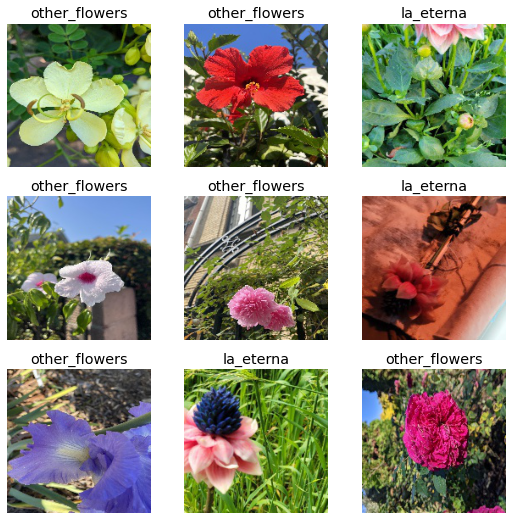

In [3]:
def get_dataset(balance=True):
    #Location of dataset in drive
    # /content/gdrive/MyDrive/CODEs/AZ/
    # /content/gdrive/MyDrive/Colab Notebooks/Alzheimer
    PATH = Path('/content/Unlocked_Challenge_4/data_cleaned/Train')
    trfm = [CropPad(170, 'zeros')]
    fnames = [ photo for classes in PATH.ls() for photo in classes.ls()]
    dls = ImageDataLoaders.from_path_func(PATH, fnames, (lambda x: x.parent.name), seed=100, item_tfms=trfm)
    dls.show_batch()
    return dls
    
dls = get_dataset()

In [7]:
def train(dls, model_name):
    learner = vision_learner(dls, model_name, metrics=error_rate)
    learner.fine_tune(10, freeze_epochs=4)
    learner.export(str(model_name))
    learner.save(Path(f"/content/Unlocked_Challenge_4/models/{str(model_name)}"))
    
    diag = ClassificationInterpretation.from_learner(learner)
    diag.print_classification_report()
    print("\n\n\n")
    return learner


learner = train(dls, models.resnet34)

epoch,train_loss,valid_loss,error_rate,time
0,1.260543,0.626283,0.299065,01:39
1,0.861693,0.296892,0.112150,01:43
2,0.621911,0.060095,0.037383,01:45
3,0.464586,0.025617,0.009346,01:44


epoch,train_loss,valid_loss,error_rate,time
0,0.053518,0.076818,0.037383,02:14
1,0.047976,0.053719,0.018692,02:20
2,0.032790,0.004344,0.000000,02:19
3,0.031211,0.005516,0.000000,02:16
4,0.025363,0.001462,0.000000,02:16
5,0.021246,0.000439,0.000000,02:17
6,0.018284,0.000245,0.000000,02:29
7,0.015143,0.000516,0.000000,02:22
8,0.012883,0.000799,0.000000,02:28
9,0.010898,0.001220,0.000000,02:31


               precision    recall  f1-score   support

    la_eterna       1.00      1.00      1.00        32
other_flowers       1.00      1.00      1.00        75

     accuracy                           1.00       107
    macro avg       1.00      1.00      1.00       107
 weighted avg       1.00      1.00      1.00       107







In [27]:
rows = []
for photo in Path('/content/Unlocked_Challenge_4/data_cleaned/scraped_images/image_files').ls():
    fname = photo.name.split('.')[0]
    result = learner.predict(photo)
    pred = result[2].numpy()
    row = [fname, pred[0], pred[1]]
    rows.append(row)
rows

[['img_13', 2.1049254e-05, 0.9999789],
 ['img_21', 2.0890511e-05, 0.99997914],
 ['img_70', 2.3922888e-07, 0.99999976],
 ['img_14', 4.9470755e-06, 0.9999951],
 ['img_89', 4.6812158e-08, 1.0],
 ['img_35', 7.5810924e-08, 0.9999999],
 ['img_06', 2.2246384e-06, 0.99999774],
 ['img_11', 3.2266158e-05, 0.9999677],
 ['img_90', 1.153515e-05, 0.99998844],
 ['img_26', 8.9926243e-07, 0.99999905],
 ['img_08', 5.2126705e-08, 1.0],
 ['img_58', 2.47501e-06, 0.9999975],
 ['img_07', 1.5092502e-05, 0.99998486],
 ['img_67', 1.2693846e-05, 0.99998736],
 ['img_20', 3.2542253e-08, 1.0],
 ['img_96', 4.0438194e-06, 0.99999595],
 ['img_15', 1.7081599e-06, 0.99999833],
 ['img_04', 2.9433306e-06, 0.999997],
 ['img_94', 0.00032892183, 0.9996711],
 ['img_57', 7.8376297e-07, 0.99999917],
 ['img_37', 8.806405e-07, 0.99999917],
 ['img_50', 5.878788e-05, 0.99994123],
 ['img_54', 1.0341704e-06, 0.9999989],
 ['img_36', 1.1152781e-06, 0.9999989],
 ['img_93', 9.319728e-08, 0.9999999],
 ['img_92', 2.2501856e-06, 0.99999774]

In [29]:
rows.sort(key=lambda x: x[0])
rows

[['img_00', 0.9798415, 0.020158486],
 ['img_01', 1.9319043e-06, 0.9999981],
 ['img_02', 4.4188905e-06, 0.9999956],
 ['img_03', 1.9097995e-06, 0.9999981],
 ['img_04', 2.9433306e-06, 0.999997],
 ['img_05', 3.712914e-07, 0.99999964],
 ['img_06', 2.2246384e-06, 0.99999774],
 ['img_07', 1.5092502e-05, 0.99998486],
 ['img_08', 5.2126705e-08, 1.0],
 ['img_09', 4.862438e-07, 0.9999995],
 ['img_10', 7.47612e-05, 0.99992526],
 ['img_11', 3.2266158e-05, 0.9999677],
 ['img_12', 8.658834e-09, 1.0],
 ['img_13', 2.1049254e-05, 0.9999789],
 ['img_14', 4.9470755e-06, 0.9999951],
 ['img_15', 1.7081599e-06, 0.99999833],
 ['img_16', 1.2668827e-06, 0.9999987],
 ['img_17', 0.99995756, 4.248465e-05],
 ['img_18', 2.6496227e-05, 0.99997354],
 ['img_19', 1.0, 5.2186883e-12],
 ['img_20', 3.2542253e-08, 1.0],
 ['img_21', 2.0890511e-05, 0.99997914],
 ['img_22', 2.2251357e-05, 0.9999777],
 ['img_23', 3.0028373e-06, 0.999997],
 ['img_24', 3.4725838e-06, 0.99999654],
 ['img_25', 4.381172e-05, 0.99995613],
 ['img_26',

In [32]:
with open('/content/Unlocked_Challenge_4/submission_file.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(rows)

In [34]:
!cp -r "/content/Unlocked_Challenge_4" "/content/gdrive/MyDrive/Colab Notebooks/"